# Finding significant difference with persistent entropy

In [27]:
import numpy as np
import ripser
import matplotlib.pyplot as plt
import random
from persim.persistent_entropy import *
from scipy import stats

In [1]:
import cechmate

ModuleNotFoundError: No module named 'cechmate'

This notebook shows how persistent entropy can be used to find significant difference in the geometrical distribution of the data. We will distinguish point clouds following a normal distribution from point clouds following a uniform distribution. Persistent entropy allow to use a one dimensional non-parametric statistical test instead of a multivariative test.

## Construct the data
We will generate a sample of 20 point clouds, 10 following a normal distribution and 10 following the uniform one. Each point cloud is 2D and have 50 points.

In [28]:
# Normal point clouds
mu = 0.5
sigma = 0.25
l1 = []
for i in range(10):
    d1 = np.random.normal(mu, sigma, (50,2))
    l1.append(d1)
# Uniform point clouds
l2 = []
for i in range(10):
    d2 = np.random.random((50,2))
    l2.append(d2)

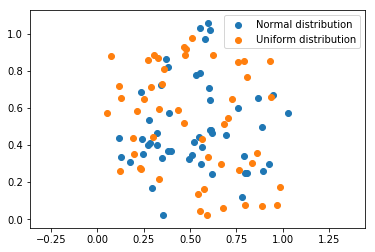

In [29]:
# Example of normal and uniform point clouds
plt.scatter(d1[:,0], d1[:,1], label="Normal distribution")
plt.scatter(d2[:,0], d2[:,1], label="Uniform distribution")
plt.axis('equal')
plt.legend()
plt.show()


## Calculate persistent entropy 
In order to calculate persistent entropy, is necessary to generate the persistent diagrams previously. Note that we do not consider the infinity bar in the computation of persistent entropy since it does not give information about the point cloud. 

In [30]:
# Generate the persistent diagrams using ripser
p = 0
dgm_d1 = []
dgm_d2 = []
for i in range(len(l1)):
    dgm_d1.append(ripser.ripser(l1[i])['dgms'][p])
    dgm_d2.append(ripser.ripser(l2[i])['dgms'][p])
# Calculate their persistent entropy.
e1 = persistent_entropy(dgm_d1)
e2 = persistent_entropy(dgm_d2)

## Statistical test
Finally, perform the statistical test which suits better for your aim. In our case, we perform the Mann–Whitney U test. You can claim there are differences in the geometry of both point clouds if the pvalue is smaller than the significance level α (usually α is 0.05).

In [31]:
stats.mannwhitneyu(e1, e2)

MannwhitneyuResult(statistic=3.0, pvalue=0.00021981937631328227)